In [1]:
import sys; sys.path.insert(0, "..")
from src.models import NLM
from src.utils import generate_data

In [2]:
from autograd import numpy as np
import matplotlib.pyplot as plt

### Generate Synthetic Data

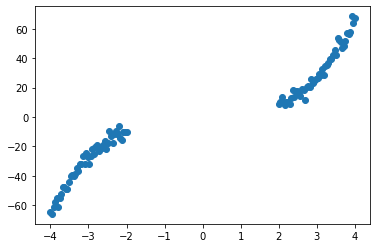

In [3]:
x, y, x_test = generate_data(number_of_points=50, noise_variance=9)

plt.scatter(x, y)
plt.show()

### Run NLM

In [4]:
###relu activation
activation_fn_type = 'relu'
activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)

width = [50,20] # using the architecture used in the paper
hidden_layers = len(width)
input_dim = 1
output_dim = 1

architecture = {'width': width,
               'hidden_layers': hidden_layers,
               'input_dim': input_dim,
               'output_dim': output_dim,
               'activation_fn_type': 'relu',
               'activation_fn_params': 'rate=1',
               'activation_fn': activation_fn}

#set random state to make the experiments replicable
rand_state = 0
random = np.random.RandomState(rand_state)

#instantiate a Feedforward neural network object
nn = NLM(architecture, random=random)
print('Number of parameters =', nn.D)

###define design choices in gradient descent
params = {
    'step_size':1e-3, 
    'max_iteration':5000, 
    'random_restarts':1,
    'reg_param':0,
}

nn.fit(x.reshape((1, -1)), y.reshape((1, -1)), params)

Number of parameters = 1141
Iteration 0 loss 2147.2490062327547; gradient mag: 5274.03212540409
Iteration 100 loss 131.75967777067825; gradient mag: 592.8048804401476
Iteration 200 loss 92.33515530327914; gradient mag: 63.809782288497296
Iteration 300 loss 85.1480531486058; gradient mag: 44.39785841171245
Iteration 400 loss 77.60115582730127; gradient mag: 41.835372230499004
Iteration 500 loss 63.49838986239401; gradient mag: 48.284686170186696
Iteration 600 loss 55.84894076379542; gradient mag: 32.09801922404774
Iteration 700 loss 50.28497052247184; gradient mag: 30.392770714223495
Iteration 800 loss 45.592156623093906; gradient mag: 29.16119605414453
Iteration 900 loss 41.43020809415729; gradient mag: 28.457965890934915
Iteration 1000 loss 37.5282960199291; gradient mag: 28.294218817286126
Iteration 1100 loss 33.86702495326494; gradient mag: 27.40331900972966
Iteration 1200 loss 30.409672606135832; gradient mag: 26.54327969901632
Iteration 1300 loss 27.038146493698015; gradient mag: 

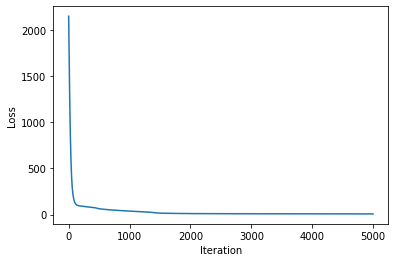

In [5]:
plt.plot(nn.objective_trace)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

### Examine MAP Model

In [6]:
y_pred = nn.forward(nn.weights, x_test)

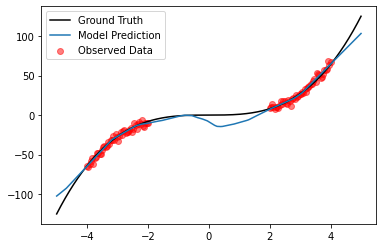

In [7]:
plt.scatter(x[0,:], y[0,:], color='red', alpha=0.5, label='Observed Data')
plt.plot(x_test[0,:], x_test[0,:]**3, color='black', label="Ground Truth")
plt.plot(x_test[0,:], y_pred[0,0,:], color='tab:blue', label="Model Prediction")
plt.legend()
plt.show()

### Examine Prior Samples

In [8]:
## WE SHOULD CONFIRM WHAT EXACT VALUES OF PRIOR VAR AND NOISE VAR THEY USED. THIS SEEMED TO AFFECT THE RESULTS A LOT
prior_mean = 0
prior_var = 5**2
noise_var = 3
y_prior = nn.get_prior_preds(x_test, w_prior_mean=prior_mean, w_prior_cov=prior_var, noise_var=noise_var)

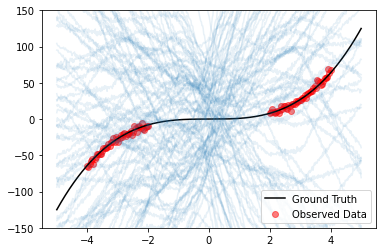

In [9]:
plt.scatter(x[0,:], y[0,:], color='red', alpha=0.5, label='Observed Data')
plt.plot(x_test[0,:], x_test[0,:]**3, color='black', label="Ground Truth")
plt.plot(x_test[0,:], y_prior.T, color='tab:blue', alpha=0.1)
plt.ylim([-150, 150])
plt.legend()
plt.show()

### Examine Posterior Samples

In [10]:
y_posterior = nn.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var)

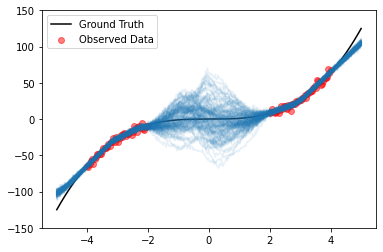

In [11]:
plt.scatter(x[0,:], y[0,:], color='red', alpha=0.5, label='Observed Data')
plt.plot(x_test[0,:], x_test[0,:]**3, color='black', label="Ground Truth")
plt.plot(x_test[0,:], y_posterior.T, color='tab:blue', alpha=0.1)
plt.ylim([-150, 150])
plt.legend()
plt.show()

In [12]:
# Calulating percentiles
pp_upper = np.percentile(y_posterior, 97.5, axis=0)
pp_lower = np.percentile(y_posterior, 2.5, axis=0)
pp_mean = np.mean(y_posterior, axis=0)

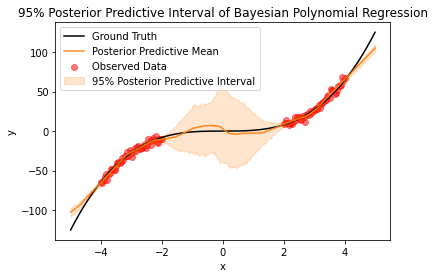

In [13]:
# Visualizing 95% posterior predictive interval of Bayesian polynomial regression
plt.scatter(x[0,:], y[0,:], color='red', alpha=0.5, label='Observed Data')
plt.plot(x_test[0,:], x_test[0,:]**3, color='black', label="Ground Truth")
plt.plot(x_test[0,:], pp_mean, color='tab:orange', alpha=0.9, label='Posterior Predictive Mean')
plt.fill_between(x_test[0,:], pp_upper, pp_lower, color='tab:orange', alpha=0.2, label='95% Posterior Predictive Interval')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title("95% Posterior Predictive Interval of Bayesian Polynomial Regression")
plt.show()

### Questions for Professor Pan and Cooper

* Is it okay to assumea prior mean of 0?
* What was the prior variance assumed in the paper?
* How is MAP as defined here any different than MLE? We are not putting any restrictions (any priors0 on the weights when calling `.fit`.